In [1]:
import json
import os
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import shutil
from datetime import datetime
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import requests

ModuleNotFoundError: No module named 'selenium'

## 1. 링크 받고 해당 게시물 이미지 저장
- 링크 사용자에게 입력 받기
- 아이디(? 비번이라 해야되나 ) 이거 받아서 img/id/번호.img로 저장

In [ ]:
def get_img(url):
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(2)
    cnt = 1

    directory = os.path.join("./img", id)
    if not os.path.exists(directory):
        os.makedirs(directory)

    while True:
        try:
            page_source = driver.page_source
            soup = BeautifulSoup(page_source, "html.parser")
            aagv = soup.find("div", class_="_aagv")
            img_html = aagv.find('img')
            img_src = img_html["src"]
            response = requests.get(img_src)

            file_name = f"./img/{id}/{(cnt-1):02d}.jpg"
            time.sleep(2)
            if response.status_code == 200:
                print(cnt)
                if cnt ==1:
                    pass
                else:
                    with open(file_name, 'wb') as file:
                        file.write(response.content)
                cnt += 1

            button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'button[aria-label="다음"]')))
            button.click()
            time.sleep(2)


        except TimeoutException:
            print("사진 저장 완료")
            break
        except Exception as e:
            print(e)
            break

In [ ]:
url = input("영상으로 만들고 싶은 게시물의 링크를 입력하세요")

영상으로 만들고 싶은 게시물의 링크를 입력하세요 https://www.instagram.com/p/C8w42U_yL9Y/?img_index=1


In [ ]:
id = input("4자리를 눌러주세요")

4자리를 눌러주세요 1027


In [ ]:
get_img(url)

1
2
3
4
5
6
7
8
9
사진 저장 완료


In [ ]:
url = input("영상으로 만들고 싶은 게시물의 링크를 입력하세요")
id = input("4자리를 눌러주세요")
get_img(url)

영상으로 만들고 싶은 게시물의 링크를 입력하세요 https://www.instagram.com/p/C8MjUAASTqF/?img_index=1
4자리를 눌러주세요 1234


1
2
3
4
5
6
7
사진 저장 완료


## 2. API 이용해서 게시물에 있는 글자 가져오기
- 구글 api
- 카카오 api

선택적 요소이나, 카카오 api를 써본 관계로 카카오 사용 (블로그에 있는거 긁어옴 ㅎ)

<br>
구글: 1000개/1일<br>
카카오: 100개/1일

카카오 사라짐 이슈 발생 ㅎㅎ

구글로 넘어갑니다.




In [ ]:
# import json
# import time
# import cv2
# import requests
# import sys
# LIMIT_PX = 1080
# LIMIT_BYTE = 1080*1080  # 1MB
# LIMIT_BOX = 40

# def kakao_ocr_resize(image_path: str):
#     """
#     ocr detect/recognize api helper
#     ocr api의 제약사항이 넘어서는 이미지는 요청 이전에 전처리가 필요.

#     pixel 제약사항 초과: resize
#     용량 제약사항 초과  : 다른 포맷으로 압축, 이미지 분할 등의 처리 필요. (예제에서 제공하지 않음)

#     :param image_path: 이미지파일 경로
#     :return:
#     """
#     image = cv2.imread(image_path)

#     height, width, _ = image.shape

#     if LIMIT_PX < height or LIMIT_PX < width:
#         ratio = float(LIMIT_PX) / max(height, width)
#         image = cv2.resize(image, None, fx=ratio, fy=ratio)
#         height, width, _ = height, width, _ = image.shape
#         cv2.imwrite(image_path, image)
#         return image_path
#     return None

In [ ]:
# def kakao_ocr(image_path: str, appkey: str):
#     """
#     OCR API request example.
#     :param image_path: 이미지 파일 경로
#     :param appkey: 카카오 앱 REST API 키
#     """
#     API_URL = 'https://dapi.kakao.com/v2/vision/text/ocr'
#     headers = {'Authorization': 'KakaoAK {}'.format(appkey)}

#     image = cv2.imread(image_path)
#     jpeg_image = cv2.imencode(".jpg", image)[1]
#     data = jpeg_image.tobytes()

#     return requests.post(API_URL, headers=headers, files={"image": data})

In [ ]:
# from matplotlib import pyplot as plt

# def process_image(image_path, appkey):
#     white = [255, 255, 255]
#     img = cv2.imread(image_path)
#     constant = cv2.copyMakeBorder(img, 200, 100, 100, 100, cv2.BORDER_CONSTANT, value=white)

#     cv2.imwrite(image_path, constant)  # 덮어쓰기

#     plt.imshow(cv2.cvtColor(constant, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()
#     time.sleep(2)
#     image_path = kakao_ocr_resize(image_path)
#     print("이미지 경로:", image_path)

#     response = kakao_ocr(image_path, appkey)
#     if response.status_code == 200:
#         output = response.json()
#         print("[OCR] output:\n{}\n".format(json.dumps(output, sort_keys=True, ensure_ascii=False, indent=2)))

#         json_output_path = image_path.replace('.jpg', '.json').replace('.png', '.json')
#         with open(json_output_path, 'w', encoding='utf-8') as json_file:
#             json.dump(output, json_file, ensure_ascii=False, indent=2)
#         print(f"OCR 결과가 {json_output_path} 파일에 저장되었습니다.")
#     else:
#         print("Error:", response.status_code, response.text)


In [ ]:
# directory_path = f'./img/{id}'
# directory_path

'./img/1027'

In [ ]:
# def main():
#     directory_path = f'./img/{id}'
#     appkey = ''

#     for filename in os.listdir(directory_path):
#         if filename.lower().endswith('.jpg'):
#             image_path = os.path.join(directory_path, filename)
#             print(f"Processing {image_path}")
#             process_image(image_path, appkey)

Processing ./img/1027/01.jpg


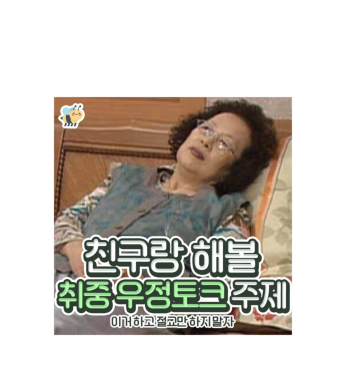

이미지 경로: ./img/1027/01.jpg
Error: 404 {"errorType":"ResourceNotFound","message":"'/vision/v2/text/ocr' is not matched"}
Processing ./img/1027/03.jpg


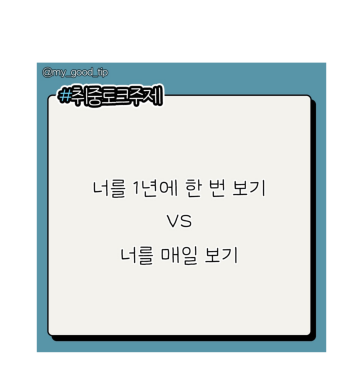

이미지 경로: ./img/1027/03.jpg
Error: 404 {"errorType":"ResourceNotFound","message":"'/vision/v2/text/ocr' is not matched"}
Processing ./img/1027/02.jpg


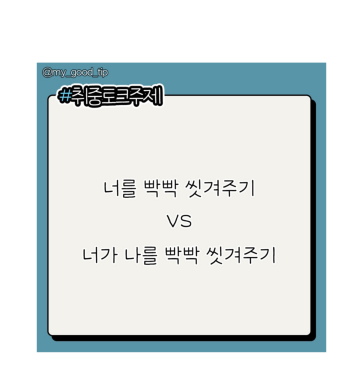

이미지 경로: ./img/1027/02.jpg
Error: 404 {"errorType":"ResourceNotFound","message":"'/vision/v2/text/ocr' is not matched"}
Processing ./img/1027/06.jpg


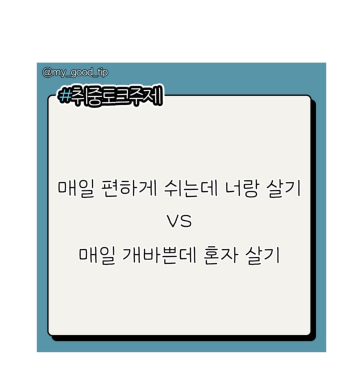

이미지 경로: ./img/1027/06.jpg
Error: 404 {"errorType":"ResourceNotFound","message":"'/vision/v2/text/ocr' is not matched"}
Processing ./img/1027/07.jpg


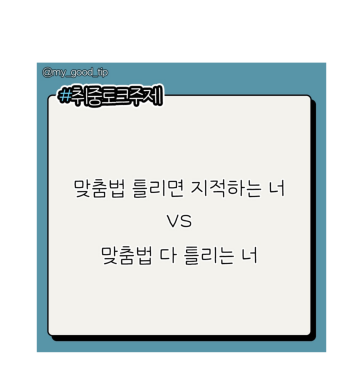

이미지 경로: ./img/1027/07.jpg
Error: 404 {"errorType":"ResourceNotFound","message":"'/vision/v2/text/ocr' is not matched"}
Processing ./img/1027/05.jpg


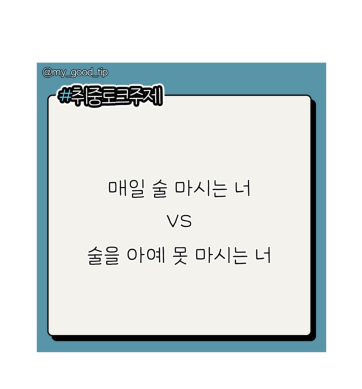

이미지 경로: ./img/1027/05.jpg
Error: 404 {"errorType":"ResourceNotFound","message":"'/vision/v2/text/ocr' is not matched"}
Processing ./img/1027/04.jpg


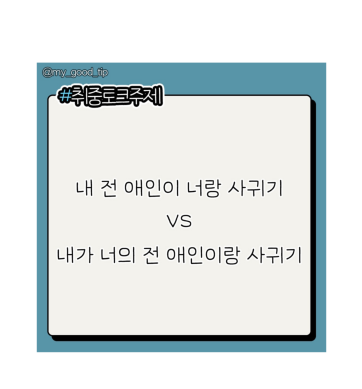

이미지 경로: ./img/1027/04.jpg
Error: 404 {"errorType":"ResourceNotFound","message":"'/vision/v2/text/ocr' is not matched"}
Processing ./img/1027/08.jpg


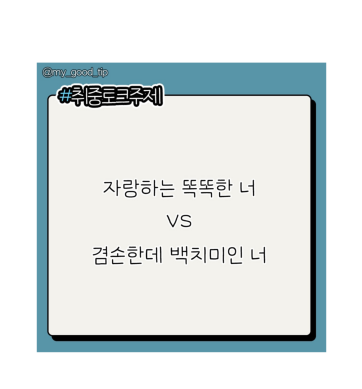

이미지 경로: ./img/1027/08.jpg
Error: 404 {"errorType":"ResourceNotFound","message":"'/vision/v2/text/ocr' is not matched"}


In [ ]:
# if __name__ == "__main__":
#     main()

In [ ]:
# 구글 ocr

In [ ]:
import os
import io
import json
import requests
import base64

def detect_text(image_path, api_key):

    API_URL = f"https://vision.googleapis.com/v1/images:annotate?key={api_key}"

    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()

    image_base64 = base64.b64encode(content).decode('utf-8')
    request_body = {
        "requests": [
            {
                "image": {
                    "content": image_base64
                },
                "features": [
                    {
                        "type": "TEXT_DETECTION"
                    }
                ]
            }
        ]
    }

    response = requests.post(API_URL, headers={"Content-Type": "application/json"}, data=json.dumps(request_body))

    if response.status_code != 200 or response.json().get('error'):
        raise Exception(f"Error: {response.json()}")

    return response.json()

def process_image(image_path, api_key):

    result = detect_text(image_path, api_key) # ocr: 텍스트 추출

    # json으로 파일 저장
    json_output_path = image_path.replace('.jpg', '.json').replace('.png', '.json')
    with open(json_output_path, 'w', encoding='utf-8') as json_file:
        json.dump(result, json_file, ensure_ascii=False, indent=2)
    print(f"OCR 결과가 {json_output_path} 파일에 저장되었습니다.")



def main(id):
    directory_path = f'./img/{id}'
    api_key = '' # 구글 api키 넣으면 됩니당

    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(directory_path, filename)
            print(f"Processing {image_path}")
            process_image(image_path, api_key)



In [ ]:
if __name__ == "__main__":
    main(id)

Processing ./img/1027/01.jpg
OCR 결과가 ./img/1027/01.json 파일에 저장되었습니다.
Processing ./img/1027/03.jpg
OCR 결과가 ./img/1027/03.json 파일에 저장되었습니다.
Processing ./img/1027/02.jpg
OCR 결과가 ./img/1027/02.json 파일에 저장되었습니다.
Processing ./img/1027/06.jpg
OCR 결과가 ./img/1027/06.json 파일에 저장되었습니다.
Processing ./img/1027/07.jpg
OCR 결과가 ./img/1027/07.json 파일에 저장되었습니다.
Processing ./img/1027/05.jpg
OCR 결과가 ./img/1027/05.json 파일에 저장되었습니다.
Processing ./img/1027/04.jpg
OCR 결과가 ./img/1027/04.json 파일에 저장되었습니다.
Processing ./img/1027/08.jpg
OCR 결과가 ./img/1027/08.json 파일에 저장되었습니다.


## 3.